In [217]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create


# Read in the data

df = pd.read_csv(r'C:\Users\vinay\Desktop\Google Data Analytics Course\Projects\Movie data analysis project with Python\archive\movies.csv')

In [14]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [219]:
# Let see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100 
    print('{} - {:.2f}%'.format(col,pct_missing))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [20]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [221]:
# Change data types for columns

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [29]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [223]:
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.00,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.00,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.00,2020


In [191]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.00,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.00,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.00,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.00,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.00,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.50,274.00,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.00,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.20,1300.00,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.00,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.00,2900.00,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.00,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.10,1500.00,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.00,1990


In [67]:
pd.set_option('display.max.rows', None)

In [20]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [250]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [5]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


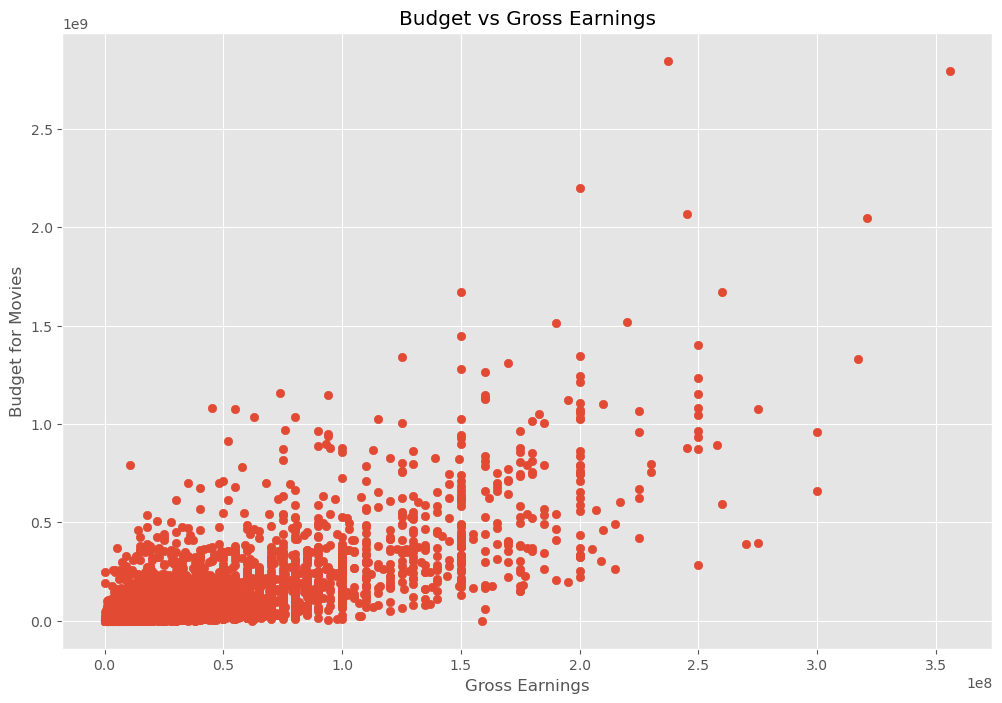

In [62]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Movies')

plt.show()


In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [225]:
pd.options.display.float_format = '{:,.0f}'.format

In [48]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",8,"1,100,000",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000","2,847,246,203",Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,"903,000",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000","2,797,501,328",Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",8,"1,100,000",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000","2,201,647,264",Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",8,"876,000",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000","2,069,521,700",Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,"897,000",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000","2,048,359,754",Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000",NaN,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750",NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000",NaN,NaN,120


Text(0, 0.5, 'Budget for Movies')

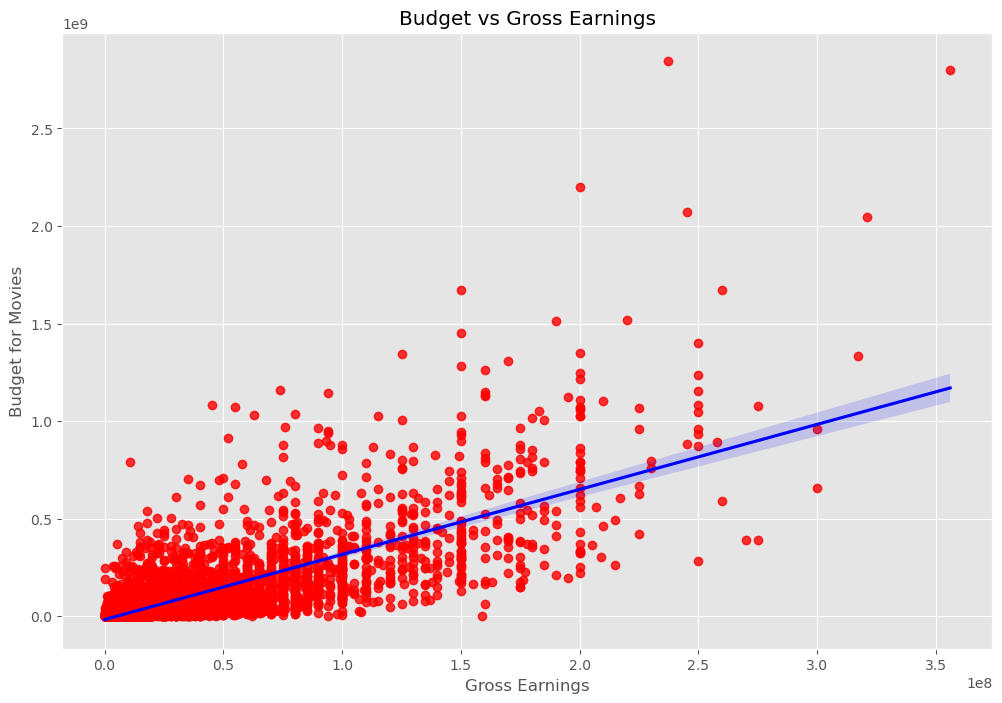

In [163]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Movies')

In [119]:
# Lets start looking at correlation

In [125]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [145]:
pearson_correlation_matrix = numeric_df.corr(method='pearson').round(2)

In [149]:
print(pearson_correlation_matrix)

         year  score  votes  budget  gross  runtime
year     1.00   0.10   0.22    0.33   0.26     0.12
score    0.10   1.00   0.41    0.08   0.19     0.40
votes    0.22   0.41   1.00    0.44   0.63     0.31
budget   0.33   0.08   0.44    1.00   0.74     0.32
gross    0.26   0.19   0.63    0.74   1.00     0.25
runtime  0.12   0.40   0.31    0.32   0.25     1.00


In [153]:
kendall_correlation_matrix = numeric_df.corr(method='kendall').round(2)
print(kendall_correlation_matrix)

         year  score  votes  budget  gross  runtime
year     1.00   0.07   0.33    0.22   0.20     0.10
score    0.07   1.00   0.30   -0.00   0.09     0.28
votes    0.33   0.30   1.00    0.35   0.55     0.20
budget   0.22  -0.00   0.35    1.00   0.51     0.24
gross    0.20   0.09   0.55    0.51   1.00     0.17
runtime  0.10   0.28   0.20    0.24   0.17     1.00


In [155]:
spearman_correlation_matrix = numeric_df.corr(method='spearman').round(2)
print(spearman_correlation_matrix)

         year  score  votes  budget  gross  runtime
year     1.00   0.10   0.47    0.32   0.29     0.14
score    0.10   1.00   0.43   -0.00   0.13     0.40
votes    0.47   0.43   1.00    0.50   0.74     0.29
budget   0.32  -0.00   0.50    1.00   0.69     0.34
gross    0.29   0.13   0.74    0.69   1.00     0.25
runtime  0.14   0.40   0.29    0.34   0.25     1.00


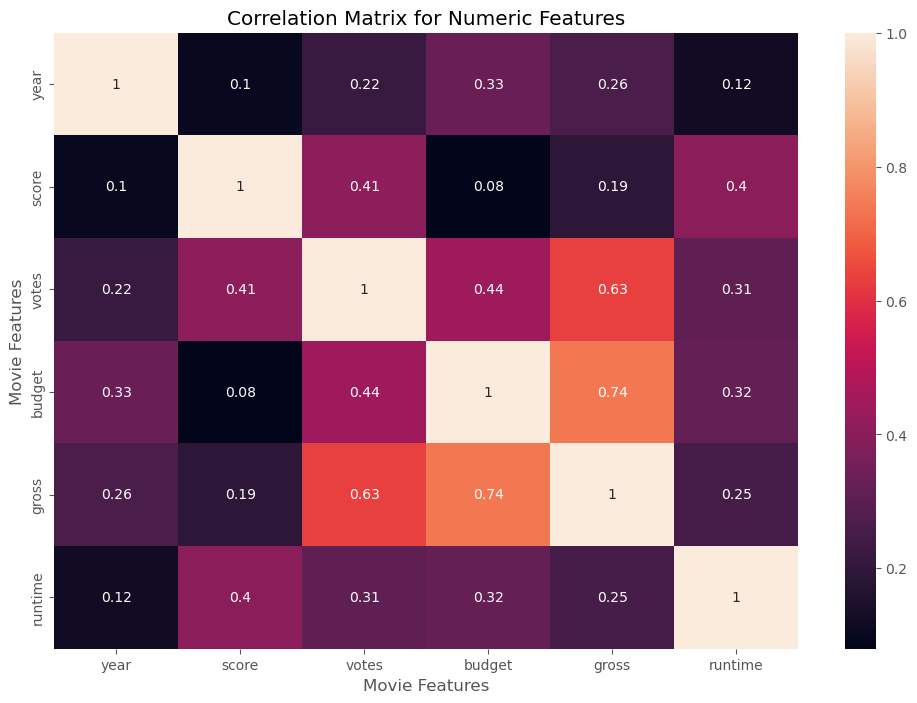

In [175]:
sns.heatmap(pearson_correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [177]:
# Looks at Comapny

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00


In [207]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.40,927000.00,2589,4014,1047,54,19000000,46998772,2319,146.00,0
1,5573,6,1,1980,1492,5.80,65000.00,2269,1632,327,55,4500000,58853106,731,104.00,0
2,5142,4,0,1980,1771,8.70,1200000.00,1111,2567,1745,55,18000000,538375067,1540,124.00,0
3,286,4,4,1980,1492,7.70,221000.00,1301,2000,2246,55,3500000,83453539,1812,88.00,0
4,1027,6,4,1980,1543,7.30,108000.00,1054,521,410,55,6000000,39846344,1777,98.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.10,18.00,1500,2289,2421,55,7000,0,-1,90.00,40
7664,1678,-1,4,2020,1107,4.70,36.00,774,2614,1886,55,0,0,539,90.00,40
7665,4717,-1,6,2020,193,5.70,29.00,2061,2683,2040,55,58750,0,941,NaN,40
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,0,-1,120.00,40


In [227]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,"927,000",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,"65,000",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,"1,200,000",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,"221,000",Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,"108,000",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",5,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",6,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120,2020


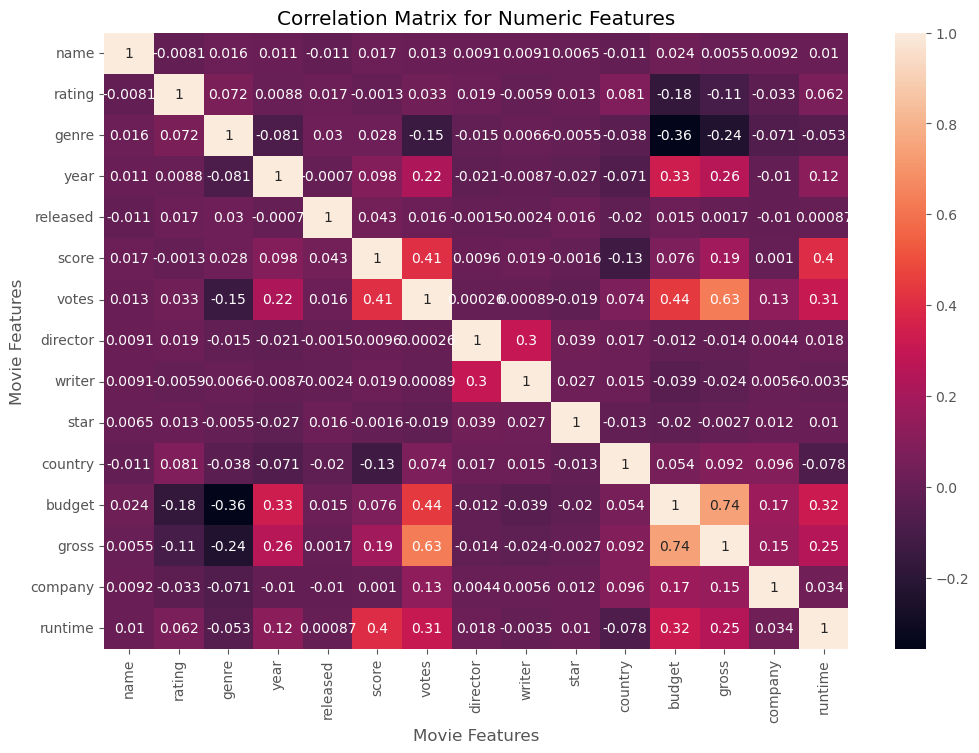

In [199]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [201]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.00,-0.01,0.02,0.01,-0.01,0.02,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01
rating,-0.01,1.00,0.07,0.01,0.02,-0.00,0.03,0.02,-0.01,0.01,0.08,-0.18,-0.11,-0.03,0.06
genre,0.02,0.07,1.00,-0.08,0.03,0.03,-0.15,-0.02,0.01,-0.01,-0.04,-0.36,-0.24,-0.07,-0.05
year,0.01,0.01,-0.08,1.00,-0.00,0.10,0.22,-0.02,-0.01,-0.03,-0.07,0.33,0.26,-0.01,0.12
released,-0.01,0.02,0.03,-0.00,1.00,0.04,0.02,-0.00,-0.00,0.02,-0.02,0.01,0.00,-0.01,0.00
score,0.02,-0.00,0.03,0.10,0.04,1.00,0.41,0.01,0.02,-0.00,-0.13,0.08,0.19,0.00,0.40
votes,0.01,0.03,-0.15,0.22,0.02,0.41,1.00,0.00,0.00,-0.02,0.07,0.44,0.63,0.13,0.31
director,0.01,0.02,-0.02,-0.02,-0.00,0.01,0.00,1.00,0.30,0.04,0.02,-0.01,-0.01,0.00,0.02
writer,0.01,-0.01,0.01,-0.01,-0.00,0.02,0.00,0.30,1.00,0.03,0.02,-0.04,-0.02,0.01,-0.00
star,0.01,0.01,-0.01,-0.03,0.02,-0.00,-0.02,0.04,0.03,1.00,-0.01,-0.02,-0.00,0.01,0.01


In [215]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs


name         name           1.00
             rating        -0.01
             genre          0.02
             year           0.01
             released      -0.01
                            ... 
yearcorrect  budget         0.30
             gross          0.26
             company       -0.01
             runtime        0.12
             yearcorrect    1.00
Length: 256, dtype: float64

In [236]:
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', '{:.6f}'.format)

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [242]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      yearcorrect   -0.079009
yearcorrect  country       -0.079009
runtime      country       -0.078412
country      runtime       -0.078412
yearcorrect  genre         -0.078210
genre        yearcorrect   -0.078210
             company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
country      genre         -0.037615
g

In [246]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes         0.632834
votes        gross         0.632834
gross        budget        0.750157
budget       gross         0.750157
yearcorrect  year          0.996397
year         yearcorrect   0.996397
name         name          1.000000
company      company       1.000000
gross        gross         1.000000
budget       budget        1.000000
country      country       1.000000
star         star          1.000000
writer       writer        1.000000
director     director      1.000000
votes        votes         1.000000
score        score         1.000000
released     released      1.000000
year         year          1.000000
genre        genre         1.000000
rating       rating        1.000000
runtime      runtime       1.000000
yearcorrect  yearcorrect   1.000000
dtype: float64

In [248]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation to the gross earnings
